In [1]:
import gustaf as gus
import numpy as np
import splinepy as sp
import vedo

vedo.settings.default_backend = "k3d"
import matplotlib.pyplot as plt
import trimesh
import deep_sdf.workspace as ws
import deep_sdf.plotting
from sdf_sampler import sdf_sampler
from sdf_sampler.plotting import scatter_contour_at_origin
from sdf_sampler.microstructures import CrossMsSDF
import os
os.chdir("/home/michael.kofler/DeepSDF")

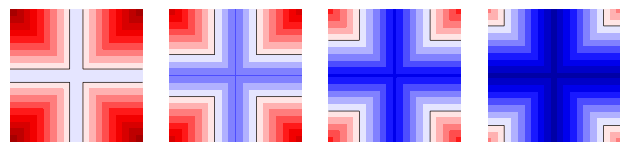

In [2]:
cm_to_inch = 1/2.54
fig, ax = plt.subplots(1, 4, figsize=(20*cm_to_inch,13.33*cm_to_inch), )
ax = ax.flatten()
defined_rs = np.linspace(0.1, 0.75, len(ax))
ms = [CrossMsSDF(r) for r in defined_rs]
for sax, sms, r in zip(ax, ms, defined_rs):
    scatter_contour_at_origin(sms.SDF, custom_axis=sax, res=300)
plt.savefig("evaluation_scripts/paper/screenshots/training_sdfs.png", dpi=300, bbox_inches="tight")

In [3]:
experiment_directory = "experiments/round_cross_big_network"
checkpoint = "1000"
# deep_sdf.plotting.show_random_training_files(experiment_directory, only_show_halve=True)

In [4]:

# geometry_dir = "data/geometry/snappy_tile"
# outdir = "data/SdfSamples"
# splitdir = "data/splits"
# SDF_sampler = sdf_sampler.SDFSampler(outdir, splitdir)
# cm_to_inch = 1/2.54
# fig, ax = plt.subplots(2, 3, figsize=(20*cm_to_inch,13.33*cm_to_inch), )
# ax = ax.flatten()

# sdfs = []

# cam = {
#     "position": (-0.680960, -0.347974, -2.80654),
#     "focal_point": (0.436938, 0.474209, 0.238206),
#     "viewup": (-0.942526, 0.0922912, 0.321133),
#     "roll": 84.5366,
#     "distance": 3.34607,
#     "clipping_range": (2.09327, 5.53179),
# }
# tiles = []
# for i, t in enumerate(np.linspace(0, 0.7, 6)):
#     tile_creator = Snappy3D()
#     tile = tile_creator.create_tile(parameters=np.array([[t]]))
#     for t in tile[0]:
#         t.show_options["knots"] = False
#         t.show_options["control_points"] = False
#     tiles.append(tile[0])
#     mesh = sp.helpme.extract.faces(sp.multipatch.Multipatch(tile[0]), 20)
#     # scale from [0,1] to [-1,1]
#     mesh.vertices = mesh.vertices*2 - np.array([1, 1, 1])
#     t_mesh = trimesh.Trimesh(vertices=mesh.vertices, faces=mesh.faces)
#     base_sdf = sdf_sampler.SDFfromMesh(t_mesh)
#     box_sdf = -sdf_sampler.BoxSDF()
#     combined_sdf = base_sdf + box_sdf
#     # print(base_sdf(np.array([[0.,2.,0.]])))
#     # combined_sdf = box_sdf
#     sdfs.append(combined_sdf)
#     ax[i].set_axis_off()
#     # ax[i].set_ylim(-0.99, 0.99)
#     scatter_contour_at_z_level(sdfs[i], eval_area=(-1,1), custom_zoom=None, flip_axes=True, custom_axis=ax[i])

# fig.tight_layout()
# # plt.savefig("screenshots/training_sdfs.png", dpi=300)
# plt.show()

# gus.show(*tiles, cam=cam, c="#EDEDED", interactive=False)

In [5]:
# import numpy as np
# import gustaf as gus
# import splinepy as sp

# from sdf_sampler.plotting import scatter_contour_at_z_level
# import matplotlib.pyplot as plt

# import torch
# from deep_sdf import workspace as ws
# import deep_sdf.utils

# import igl
# params = {'text.usetex': False, 'mathtext.fontset': 'cm', 'axes.labelsize': 12}
# plt.rcParams.update(params)

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# device = torch.device("cpu")
# import os
# os.chdir("/home/michael.kofler/DeepSDF")
# experiment_directory = "experiments/double_lattice_3D_no_topo"
# checkpoint = "1000"

# graded = True

In [6]:

# latent = ws.load_latent_vectors(experiment_directory, checkpoint).to("cpu").numpy()
# decoder = ws.load_trained_model(experiment_directory, checkpoint).to(device)
# decoder.eval()
                                  
# control_points_graded = np.array([latent[20], latent[39], latent[0],  latent[39],  latent[39], latent[0]])
# control_points_ungraded = np.array([latent[20]]*6)

# control_points_for_min_max = np.vstack([control_points_graded, control_points_ungraded])

# r_min = control_points_for_min_max[:,0].min()
# r_max = control_points_for_min_max[:,0].max()
# g_min = control_points_for_min_max[:,1].min()
# g_max = control_points_for_min_max[:,1].max()


# if graded:
#     graded_string = "_graded"
#     control_points = np.vstack([control_points_graded, control_points_graded])
# else:
#     graded_string = ""
#     control_points = np.vstack([control_points_ungraded, control_points_ungraded])

# latent_vec_interpolation = sp.BSpline(
#     degrees=[1, 2, 1],
#     knot_vectors=[[-1, -1, 1, 1], 
#                 [-1, -1, -1, 1, 1, 1], 
#                 [-1, -1, 1, 1]],
#     control_points=control_points,
# )
# print(control_points)
# fig, axs = plt.subplots(1, 2, figsize=(9/2.54, 5/2.54))
# x = np.linspace(-1, 1, 1000)
# y = np.linspace(-1, 1, 1000)
# X, Y = np.meshgrid(x, y)


# # Compute the z values for the grid
# Z = latent_vec_interpolation.evaluate(np.hstack([X.reshape(-1,1), Y.reshape(-1,1), np.zeros_like(Y.reshape(-1,1))]))
# z_show = np.sqrt(Z[:,0]**2 + Z[:,1]**2).reshape(X.shape)
# z_show = Z[:,1].reshape(X.shape)
# axs[0].contourf(Y, X, Z[:,0].reshape(X.shape), cmap="plasma")
# axs[1].contourf(Y, X, Z[:,1].reshape(X.shape), cmap="plasma")

# r = Z[:,0].reshape(X.shape)
# g = Z[:,1].reshape(X.shape)

# r_norm = (r-r_min)/(r_max-r_min) 
# g_norm = (g-g_min)/(g_max-g_min)
# for ax in axs:
#     ax.set_xticks([]) 
#     ax.set_yticks([]) 
#     ax.set_xlabel(r"$x$")
#     ax.set_ylabel(r"$y$")
# # plt.savefig(f"evaluation_scripts/wccm/structure_latent{graded_string}.png", dpi=600, bbox_inches="tight")


In [7]:

# def transform(x, t):
#     p = 2/t
#     return (2/p)*torch.abs((x-t%2) % (p*2) - p) -1 

# def sdf_struct(queries):
#     queries = torch.tensor(queries, dtype=torch.float32).to(device)
#     tx, ty, tz = [2, 5, 1]


#     samples = torch.zeros(queries.shape[0], 3)
#     samples[:, 0] = transform(queries[:, 0], tx)
#     samples[:, 1] = transform(queries[:, 1], ty)
#     samples[:, 2] = transform(queries[:, 2], tz)
#     lat_vec_red = torch.tensor(latent_vec_interpolation.evaluate(queries.cpu().numpy()), dtype=torch.float32)
#     queries = torch.hstack([torch.tensor(lat_vec_red).to(torch.float32).to(device), samples])

#     return deep_sdf.utils.decode_sdf(decoder, None, queries).squeeze(1).detach().cpu().numpy()


# fig, ax = plt.subplots(1, 1, figsize=(9/2.54, 5/2.54))


# x = torch.linspace(0, 1, 1000)
# y = transform((x-0.5)*2, 5)
# ax.plot(x.cpu().numpy(), y.cpu().numpy())
# ax.set_xlabel(r"$x$")
# ax.set_ylabel(r"$\^x$")
# ax.set_xticks([]) 
# ax.set_yticks([]) 

# # plt.savefig(f"evaluation_scripts/wccm/structure_parameter_transform{graded_string}.png", dpi=600, bbox_inches="tight")


In [8]:

# fig, ax = plt.subplots(1, 1, figsize=(5/2.54, 5/2.54))
# scatter_contour_at_z_level(sdf_struct, custom_axis=ax, res=1000, flip_axes=True, eval_area=(-1,1), scale=(1,1))
# ax.set_xlabel(r"$x$")
# ax.set_ylabel(r"$y$")
# ax.set_xticks([]) 
# ax.set_yticks([]) 
# # plt.savefig(f"evaluation_scripts/wccm/structure_sdf{graded_string}.png", dpi=600, bbox_inches="tight")
# fig, ax = plt.subplots(1, 1, figsize=(5/2.54*10/4, 5/2.54))
# scatter_contour_at_z_level(sdf_struct, custom_axis=ax, res=1000, flip_axes=True, eval_area=(-1,1), scale=(5,2))
# ax.set_xlabel(r"$\bar{x}$")
# ax.set_ylabel(r"$\bar{y}$")
# ax.set_xticks([]) 
# ax.set_yticks([]) 
# # plt.savefig(f"evaluation_scripts/wccm/structure_sdf_scaled{graded_string}.png", dpi=600, bbox_inches="tight")


In [9]:


# # vedo_showable.screenshot(f"evaluation_scripts/wccm/structure_mesh{graded_string}.png")
# # t_in = tetgenpy.TetgenIO()
# # t_in.setup_plc(dmesh.vertices, dmesh.faces.tolist())
# # t_out = tetgenpy.tetrahedralize("pqa", t_in)

# # showable = gus.show(*tiles, cam=cam, c="#EDEDED", interactive=False)
# # print(showable)
# # showable.screenshot("evaluation_scripts/wccm/training_tiles.png")

# # fancy FFD


# cap_border_dict = {
#     "z0": {"cap": 1, "measure": 0.1},
#     "z1": {"cap": 1, "measure": 0.1},
# }


# tiling = [2, 1, 5]
# N_base = 50
# N = [N_base * t+1 for t in tiling]

# verts, faces = deep_sdf.mesh.create_mesh_microstructure(tiling, decoder, latent_vec_interpolation, "none", cap_border_dict=cap_border_dict, N=N, use_flexicubes=False)
# # create spline
# spline_3d = sp.helpme.create.box(4.5, 2.5, 5.5)
# spline_3d.elevate_degrees([0, 1, 2])

# # manipulate cps
# # center cps
# cp_bounds = spline_3d.control_point_bounds
# spline_3d.control_points -= (cp_bounds[1] - cp_bounds[0]) / 2
# # use multi_index to get mid slice ids
# z_slice_ids = spline_3d.multi_index[:, :, 1]
# # rotate
# spline_3d.control_points[z_slice_ids] = gus.utils.arr.rotate(
#     spline_3d.control_points[z_slice_ids], [0, 0, 79]
# )



# # bring slightly outside vertices back 
# verts[verts>1] = 1
# verts[verts<0] = 0

# verts_FFD_transformed = spline_3d.evaluate(verts)

# surf_mesh = gus.faces.Faces(verts_FFD_transformed, faces)

# r = igl.decimate(surf_mesh.vertices, surf_mesh.faces, int(1e5))
# dmesh = gus.Faces(r[1], r[2])


# vedo_showable = gus.show(dmesh, interactive=False, c="#EDEDED", lw=1)
# vedo_showable.screenshot("evaluation_scripts/wccm/structure_mesh_fancy_FFD.png")